<h1>Effect of Material Parameters under Tensile Loading

<h2> Equations

The objective of this work is to study the effects of material parameters on mechanical behavior under mechanical loading. By developing a Graph Neural Network (GNN) as a surrogate model, we aim to accelerate predictions more efficiently than continuum damage mechanics. This approach allows for rapid parameter identification while effectively capturing the complexity of finite element analysis for complex geometries.

We select a complex geometry that demonstrates non-uniform deformation and stress distributions, facilitating the detection of any model errors or areas of uncertainty and showcasing the strength of our framework.

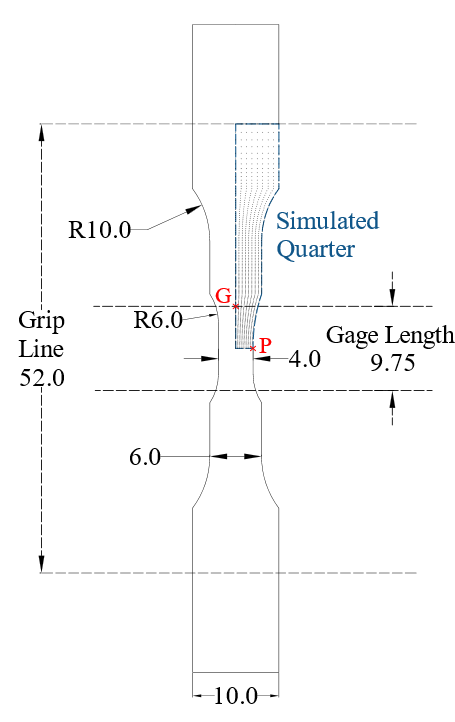

<h3>Continuum Damage Plasticity </h3>

The coupling between viscoplastic constitutive equations and damage is achieved by replacing the stress tensor in the plastic potential of defect-free material with the effective stress. This is based on the work of Chow et al. Additionally, the yield criterion, denoted as $f^p$ and described according to Hill (1948) to represent anisotropic material plasticity, is expressed as the difference between the effective equivalent plastic stress $\tilde{\sigma}_{\text{Hard}}^{\text{eq}}$ and the isotropic hardening term $R(p)$, such that:

$$
f^p = \tilde{\sigma}_{\text{Hard}}^{\text{eq}} - R(p) = 0
$$

The Hill equivalent stress $\tilde{\sigma}_{\text{Hard}}^{\text{eq}}$ accounting for kinematic hardening is defined as given, where $b$ represents the backstress used to describe viscohyperelastic behavior:

$$
\tilde{\sigma}_{\text{Hard}}^{\text{eq}} = \left(\frac{1}{2} (\sigma - b) : (\sigma - b)\right)^{1/2}
$$

Stress is integrated from the stress rate, defined as a function of the elastic part of the rate of deformation tensor $D$ and the effective stiffness tensor $\tilde{C}$:

$$
\dot{\sigma} = \tilde{C} : [D - D^p] = \tilde{C} : D^e
$$

The plastic rate of deformation $D^p$ is derived as:

$$
D^p = \lambda^p  \left(\frac{\partial f^p}{\partial \sigma}\right) = \frac{\lambda^p}{2\tilde{\sigma}_{\text{Hard}}^{\text{eq}}} : (\sigma - b)
$$

where $\lambda^p$ is a directional plastic multiplier approximated by the directional cumulative plastic strain rate $\dot{p}$. And $\dot{p}$ represents the rate-dependent plastic flow stress in shear and accounts for the viscosity associated with chain segment rotation, intermolecular barriers, and chain reptation during alignment along the loading direction through $b$. The plastic shear rate is described by a power law equation where $m$ is the strain rate sensitivity parameter, $\gamma^p$ represents the initial plastic rate, and $s$ is the directional shear strength resistance:

$$
\dot{p} = \gamma^p \left(\frac{\tilde{\sigma}_{\text{Hard}}^{\text{eq}}}{s}\right)^{1/m}
$$

The directional shear strength resistance $\dot{s}$ evolves according to Stringfellow et al. (1992) as shown:

$$
\dot{s} = \dot{p} \frac{s}{n^h}  \left(\frac{s^s}{s}\right)^{n^h}
$$

where $n^h$ is a hardening coefficient and $s^s$ is the directional hardening saturation limit. The hardening saturation limit is used to account for anisotropic hardening, where $cf$ denotes the directional coefficient of hardening. This formulation is intended to capture different hardening coefficients observed when loading along different material directions, especially in microporous films.

<h3> Backstress </h3>
The constitutive model under consideration exhibits a compelling adherence to the 8-chain Boyce model, a paradigm renowned for its comprehensive depiction of the mechanical behavior of polymeric materials. In essence, the 8-chain Boyce model serves as a theoretical framework, delineating the intricate interplay between microstructural features and macroscopic mechanical response. At its core, this model is rooted in the premise that the behavior of polymers stems from the deformation and alignment of polymer chains under stress, offering profound insights into their viscoelastic nature.

$$
\mathbb{R}^{8-ch}_{ijkl} = -\frac{1}{3} c^R \sqrt{N} \left[ \left( \frac{\xi_c - \beta_c}{\sqrt{N} \lambda_c} \right) B_{ij} B_{kl} + \frac{\beta_c}{B_{mm} \lambda_c} (\delta_{ik} B_{jl} + B_{ik} \delta_{jl}) \right]
$$


<h2>Simulation


- The initial shear resistance significantly alters the yield strength of the material, indicating its resistance to deformation under shear stress.
- The rubbery modulus directly influences the hardening behavior of polymers, affecting how the material responds to plastic deformation.
- The number of segments between entanglements in the polymer network impacts the mechanical properties of the material, particularly its elasticity and toughness.
- The Elastic's modulus directly affects the elastic stiffness of a material, determining its ability to resist elastic deformation under load.


In [1]:
print('Importing Libraries')
### Import Libraries
import os
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
import functions.model_RGNN as model
from sklearn.preprocessing import StandardScaler
from torch.optim.lr_scheduler import ExponentialLR
from functions.utils_RGNN import*
import os
import time
import copy
import datetime
import json
import torch
import collections
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import os
import matplotlib.colors as mcolors
import cv2
import os
from IPython.display import clear_output
import time
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
from IPython.display import display, clear_output
from IPython.display import HTML
import json

wDr = os.getcwd()
### Save Location
# Saving
os.chdir(wDr)
path = wDr + '/model'
model_name = '/model.pt'

### Loading Machine Learning Model
load_model = True

if load_model == True:
    learned_model = model.EncodeProcessDecode(
                        node_feat_size = 7,                    
                        edge_feat_size = 3,
                        output_size=4,
                        latent_size=128,
                        message_passing_steps=10,
                        window = 1)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # device = torch.device('cpu')
    model = learned_model.to(device)    
    model.load_state_dict(torch.load(path + model_name, map_location=device))

    
### Custom CSS Interface
display(HTML("""
<style>
    .widget-label { 
        min-width: 20ex !important; 
        max-width: 30ex !important; 
        word-wrap: break-word;
    }
</style>
"""))


mean_array = np.array([1.5385909298670306, 9.629088339561918, 3.827083166666664, 5.2692983809523835, 434.68045121428565,  639.4987465714283, 0.0, -0.015128178126523164, 5.584694109223598, 14.810351268758422, 0.3373928084163192])  # Replace with your mean values
std_array = np.array([[1.131297798928971, 6.494407672040135, 1.9426057517469186, 1.883718056332627, 216.39271764016704,  230.52290966435916, 1.0, 0.019269810164758188, 3.9308818796619924, 13.699886193474303, 0.9500569002991748]])  # Replace with your standard deviation values

def update_params(param0, param1, param2, param3):
    param = np.array([param0, param1, param2, param3])
    for i in range(len(param)):
        param[i] = (param[i] - mean_array[i+2]) / std_array[0][i+2]
    # Path to save the JSON file
    os.chdir(wDr)
    file_path = "field/param.txt"
    with open(file_path, "w") as json_file:
        json.dump(param.tolist(), json_file)
    print('Processing Complete ✔')

def on_predict_button_clicked(button):
    with output1:
        clear_output()
        update_params(param0_slider.value, param1_slider.value, param2_slider.value, param3_slider.value)

# Initialize parameters
param = np.array([5.6, 7.2, 721.05, 1000.0])  # Initial values
param0_slider = widgets.FloatSlider(value=param[0], min=param[0]-10, max=param[0]+10, step=1, description='Shear Resistance', layout=widgets.Layout(width='600px'))
param1_slider = widgets.FloatSlider(value=param[1], min=param[1]-10, max=param[1]+10, step=1, description='Chain Density', layout=widgets.Layout(width='600px'))
param2_slider = widgets.FloatSlider(value=param[2], min=param[2]-500, max=param[2]+500, step=50, description='Chain Entanglement', layout=widgets.Layout(width='600px'))
param3_slider = widgets.FloatSlider(value=param[3], min=param[3]-500, max=param[3]+500, step=50, description='Elastic Modulus', layout=widgets.Layout(width='600px'))

# Create predict button
predict_button = widgets.Button(description="Set Parameters")
output1 = widgets.Output()  # Output widget to display messages

predict_button.on_click(on_predict_button_clicked)
ui = widgets.VBox([param0_slider, param1_slider, param2_slider, param3_slider, predict_button, output1])
# Display widgets
display(ui)

Importing Libraries


In [2]:
def test_f(model, test_data, geom = 0):
    ### Expriment Boundary Conditions
    E11 = 0.08; # finite strain component of Green-Lagrangian strain tensor
    e11 = np.sqrt(2*E11 + 1) - 1;
    steps = 151
    bc_strainPBC = np.linspace(0,e11,num = steps)

    ### Perform Predictions
    start_step = 1
    delta_step = 15
    steps = 151

    model.eval()
    combined_data = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    edge_index = test_data[geom].edge_index.to(device)
    node_features = test_data[geom].node_features.to(device)
    edge_features = test_data[geom].edge_features.to(device)
    print('Performing Predictions, Please Wait...')

    for step in range(start_step, steps, delta_step):
        node_features_tmp = torch.cat([node_features, bc_strainPBC[step] * torch.ones(node_features.shape[0], 1, device=device)], dim=-1)                    
        data = Data(edge_index=edge_index - 1, x = node_features_tmp, edge_attr = edge_features)
        data = data.to(device)

        with torch.no_grad():
            start_time = time.time()
            out = model(data)
        out_step = out.cpu().numpy()
        input_data = node_features_tmp.cpu().numpy()
        combined_step_data = np.concatenate((input_data, out_step), axis=1)
        combined_data.append(combined_step_data)
    combined_data_np = np.vstack(combined_data)
    np.save(f'results/predictions.npy', combined_data_np)
    return combined_data_np

global data_field11, data_field2

def perform_simulation(b):
    global data_field11, data_field2
    output2.clear_output(wait=True)
    with output2:
        ### Folder Management
        folders_to_create = ["results", "results/images", "results/curve"]
        for folder_path in folders_to_create:
            if not os.path.exists(folder_path):
                os.makedirs(folder_path)
                print(f"Created folder: {folder_path}")

        field_path = os.path.join(wDr, 'field')
        test_data = load_graph(path=field_path, num_files=1, steps=151)
        os.chdir(wDr)
        data = test_f(model, test_data)
        
        scaled_data = data  # Assuming 'data' is appropriately scaled
        original_data = scaled_data * std_array + mean_array
        coordinate = original_data[:1098, [0,1]]
        field1 = original_data[:,[7,8]].reshape(10,1098,2)
        field2 = original_data[:,[9,10]].reshape(10,1098,2)
        updated_data_coordinate = coordinate.copy()
        data_field10 = field1[:,:,0]
        data_field11 = field1[:,:,1]
        data_field2 = field2[:,:,0]
        
        def plot_image(i):
            norm = plt.Normalize(vmin=0, vmax=100)
            cmap = mcolors.LinearSegmentedColormap.from_list(
                'custom_colormap',
                ['green', 'lightgreen', 'yellow', 'orange', 'red'],
                N=256)
            plt.figure(figsize=(2, 6))
            plt.clf()
            norm = plt.Normalize(vmin=0, vmax=100)
            cmap = mcolors.LinearSegmentedColormap.from_list(
                'custom_colormap', ['green', 'lightgreen', 'yellow', 'orange', 'red'], N=256)
            temp = data_field2[i,:]
            plt.xlim(-1, 6)
            plt.ylim(-5, 50)
            plt.yticks(np.arange(-5, 51, 5))
            plt.scatter(updated_data_coordinate[:, 0] + data_field10[i,:], updated_data_coordinate[:, 1] + data_field11[i,:], c=temp, cmap=cmap, norm=norm, marker='o', s=5)
            cbar = plt.colorbar()
            plt.grid()
            plt.title('run')
            plt.show()
            
        interact(plot_image, i=IntSlider(min=0, max=data_field2.shape[0]-1, step=1, continuous_update=False))
        # plot_node_data()

def plot_node_data():
    plt.plot(data_field11[:, 98] / 4.875, data_field2[:, 405], '-o')
    plt.title(f'')
    plt.xlabel('Displacement')
    plt.ylabel('Stress')
    plt.grid(True)
    # plt.ylim(0,100)
    # plt.xlim(-1,5)
    plt.show()
    

# Set up the button and output widget
button = widgets.Button(description='Run Simulation', tooltip='Click to start the simulation')
output2 = widgets.Output()
button.on_click(perform_simulation)
display(button, output2)

Button(description='Run Simulation', style=ButtonStyle(), tooltip='Click to start the simulation')

Output()